In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import LinRegAC.utilsAC as utilsAC
import LinRegAC.linRegAC as linRegAC
import LinRegAC.crossValdAC as crossValdAC

In [2]:
CH_dataCols = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
CHdata = pd.read_csv('computer_hardware/machine.data', names=CH_dataCols)
CHdata

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
CHdata_x = CHdata[CHdata.columns[2:-2]]
CHdata_y = CHdata[CHdata.columns[-2]]

In [4]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(CHdata_x, CHdata_y, 0.8)

In [5]:
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

In [6]:
linReg1 = linRegAC.LinReg(mode=1)
linReg1.fit(train_x, train_y)
pred1 = linReg1.predict(test_x)
print(f'MSE: {utilsAC.getMse(test_y, pred1)}, RMSE: {utilsAC.getRmse(test_y, pred1)}')

Fitting completed.
Mode = 1, using Normal equation w = (X^T X)^-1 X^T y

MSE: 6156.618384998972, RMSE: 78.46412164167118


In [7]:
lrs = [0.01, 0.005, 0.003, 0.001]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'violet', 'purple']

In [8]:
hld_cv = crossValdAC.CrossVald(option='holdout')
gd_hld_train_costs, gd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 58.5859
Iteration  200 | Loss = 57.6254
Iteration  300 | Loss = 57.4292
Iteration  400 | Loss = 57.3643
Iteration  500 | Loss = 57.3416
Iteration  600 | Loss = 57.3336
Iteration  700 | Loss = 57.3308
Iteration  800 | Loss = 57.3298
Iteration  900 | Loss = 57.3295
Iteration 1000 | Loss = 57.3293
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4745.777590795718, RMSE: 68.88960437392363
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 55.3151
Iteration  200 | Loss = 53.7380
Iteration  300 | Loss = 53.3865
Iteration  400 | Loss = 53.2835
Iteration  500 | Loss = 53.2502
Iteration  600 | Loss = 53.2388
Iteration  700 | Loss = 53.2348
Iteration  800 | Loss = 53.2333
Iteration  900 | Loss = 53.2328
Iteration 1000 | Loss = 53.2326
Fitting 

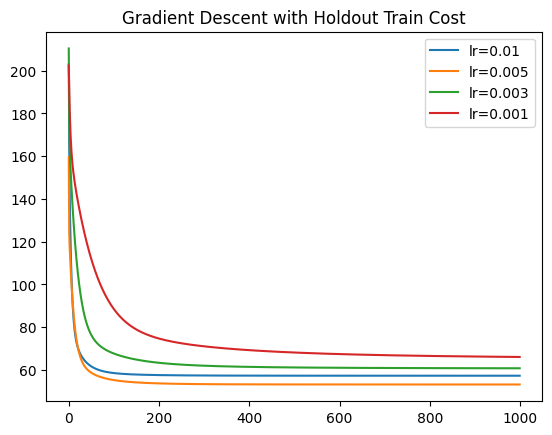

In [9]:
for i in range(len(gd_hld_train_costs)):
    plt.plot(gd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Gradient Descent with Holdout Train Cost')
plt.show()

In [10]:
print(gd_hld_opt_model)

{'rmse': 44.753744096345535, 'lr': 0.001}


In [11]:
sgd_hld_train_costs, sgd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 59.1462
Iteration  200 | Loss = 58.2380
Iteration  300 | Loss = 58.0834
Iteration  400 | Loss = 58.0434
Iteration  500 | Loss = 58.0326
Iteration  600 | Loss = 58.0298
Iteration  700 | Loss = 58.0293
Iteration  800 | Loss = 58.0293
Iteration  900 | Loss = 58.0294
Iteration 1000 | Loss = 58.0295
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4572.628399409509, RMSE: 67.6212126437371
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 38.4622
Iteration  200 | Loss = 37.9116
Iteration  300 | Loss = 37.8351
Iteration  400 | Loss = 37.8162
Iteration  500 | Loss = 37.8107
Iteration  600 | Loss = 37.8091
Iteration  700 | Loss = 37.8086
Iteration  800 | Loss = 37.8085
Iteration  900 | Loss = 37.8085
Iteration 1000 | Loss = 37.8085

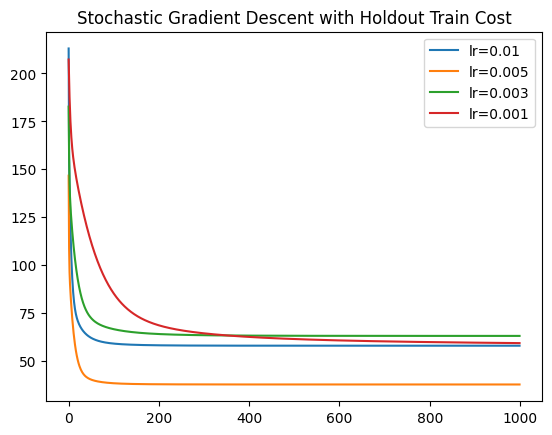

In [12]:
for i in range(len(sgd_hld_train_costs)):
    plt.plot(sgd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Stochastic Gradient Descent with Holdout Train Cost')
plt.show()

In [13]:
print(sgd_hld_opt_model)

{'rmse': 49.84911640360968, 'lr': 0.003}


In [14]:
montc_cv = crossValdAC.CrossVald(option='monte_carlo', monte_carlo=5)
gd_montc_train_costs, gd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 49.5362
Iteration  200 | Loss = 48.3503
Iteration  300 | Loss = 48.0113
Iteration  400 | Loss = 47.9005
Iteration  500 | Loss = 47.8642
Iteration  600 | Loss = 47.8523
Iteration  700 | Loss = 47.8484
Iteration  800 | Loss = 47.8471
Iteration  900 | Loss = 47.8467
Iteration 1000 | Loss = 47.8466
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 7630.984719832626, RMSE: 87.35550766741973
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 45.2623
Iteration  200 | Loss = 44.9814
Iteration  300 | Loss = 44.9525
Iteration  400 | Loss = 44.9487
Iteration  500 | Loss = 44.9482
Iteration  600 | Loss = 44.9481
Iteration  700 | Loss = 44.9481
Iteration  800 | Loss = 44.9481
Iteration  900 | Loss = 44.9481
Iteration 1000 | Loss = 44.9481
Fitti

In [15]:
print(gd_montc_opt_model)

{'rmse': 58.814990472539364, 'lr': 0.001}


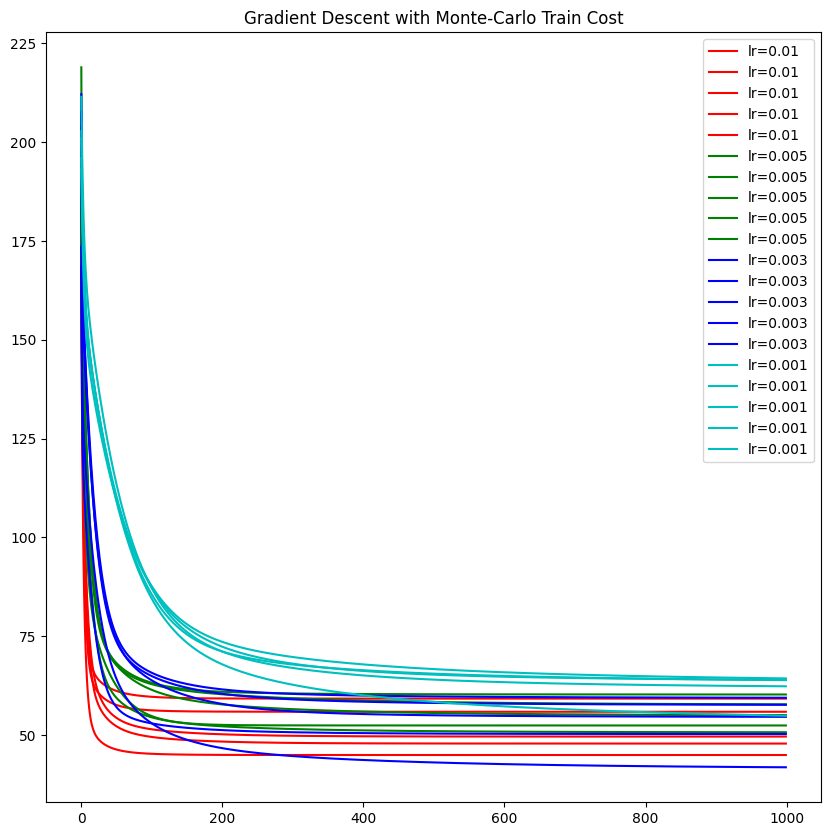

In [16]:
plt.figure(figsize=(10, 10))
for i in range(len(gd_montc_train_costs)):
    for j in range(len(gd_montc_train_costs[i])):
        plt.plot(gd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with Monte-Carlo Train Cost')
plt.show()

In [17]:
sgd_montc_train_costs, sgd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 47.3607
Iteration  200 | Loss = 47.1400
Iteration  300 | Loss = 47.1212
Iteration  400 | Loss = 47.1196
Iteration  500 | Loss = 47.1197
Iteration  600 | Loss = 47.1198
Iteration  700 | Loss = 47.1198
Iteration  800 | Loss = 47.1198
Iteration  900 | Loss = 47.1199
Iteration 1000 | Loss = 47.1199
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 7334.447500880381, RMSE: 85.64138894763666
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 58.4000
Iteration  200 | Loss = 56.9599
Iteration  300 | Loss = 56.5336
Iteration  400 | Loss = 56.3859
Iteration  500 | Loss = 56.3361
Iteration  600 | Loss = 56.3209
Iteration  700 | Loss = 56.3173
Iteration  800 | Loss = 56.3171
Iteration  900 | Loss = 56.3178
Iteration 1000 | Loss = 56.

In [18]:
print(sgd_montc_opt_model)

{'rmse': 49.59258516309102, 'lr': 0.001}


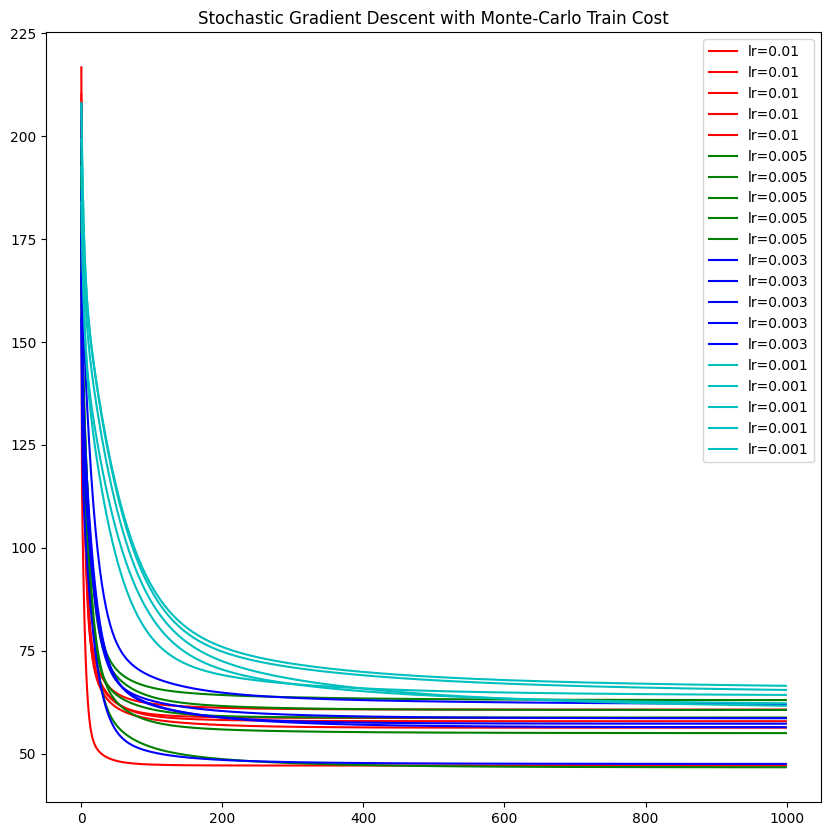

In [19]:
plt.figure(figsize=(10, 10))
for i in range(len(sgd_montc_train_costs)):
    for j in range(len(sgd_montc_train_costs[i])):
        plt.plot(sgd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with Monte-Carlo Train Cost')
plt.show()

In [20]:
kfold_cv = crossValdAC.CrossVald(option='k_fold', k_fold=6)
gd_kfold_train_costs, gd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 58.8630
Iteration  200 | Loss = 58.6464
Iteration  300 | Loss = 58.6355
Iteration  400 | Loss = 58.6348
Iteration  500 | Loss = 58.6347
Iteration  600 | Loss = 58.6347
Iteration  700 | Loss = 58.6347
Iteration  800 | Loss = 58.6347
Iteration  900 | Loss = 58.6347
Iteration 1000 | Loss = 58.6347
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5289.3493750663465, RMSE: [72.72791331439633]
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 58.2197
Iteration  200 | Loss = 57.4524
Iteration  300 | Loss = 57.2567
Iteration  400 | Loss = 57.2011
Iteration  500 | Loss = 57.1851
Iteration  600 | Loss = 57.1805
Iteration  700 | Loss = 57.1792
Iteration  800 | Loss = 57.1788
Iteration  900 | Loss = 57.1787
Iteration 1000 | Loss = 57.1786
Fitting

In [21]:
print(gd_kfold_opt_model)

{'rmse': 66.75130551860374, 'lr': 0.005}


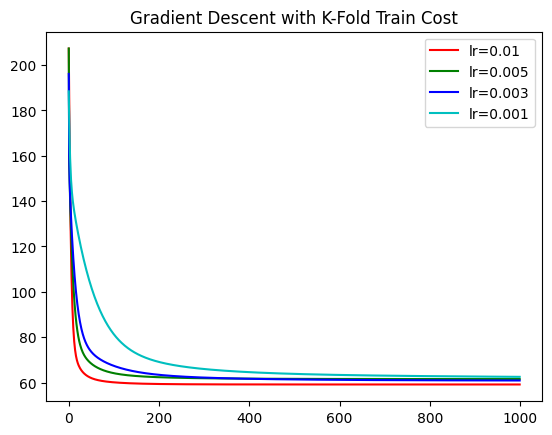

In [22]:
for i in range(len(gd_kfold_train_costs)):
    plt.plot(gd_kfold_train_costs[i], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with K-Fold Train Cost')
plt.show()

In [23]:
sgd_kfold_train_costs, sgd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 60.1885
Iteration  200 | Loss = 59.3929
Iteration  300 | Loss = 59.1759
Iteration  400 | Loss = 59.1132
Iteration  500 | Loss = 59.0949
Iteration  600 | Loss = 59.0896
Iteration  700 | Loss = 59.0881
Iteration  800 | Loss = 59.0877
Iteration  900 | Loss = 59.0876
Iteration 1000 | Loss = 59.0875
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3636.616783080602, RMSE: [60.304367860716376]
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 61.7910
Iteration  200 | Loss = 61.2029
Iteration  300 | Loss = 61.0822
Iteration  400 | Loss = 61.0507
Iteration  500 | Loss = 61.0417
Iteration  600 | Loss = 61.0389
Iteration  700 | Loss = 61.0379
Iteration  800 | Loss = 61.0375
Iteration  900 | Loss = 61.0374
Iteration 1000 | Loss = 61.03

In [24]:
print(sgd_kfold_opt_model)

{'rmse': 66.769993400588, 'lr': 0.003}


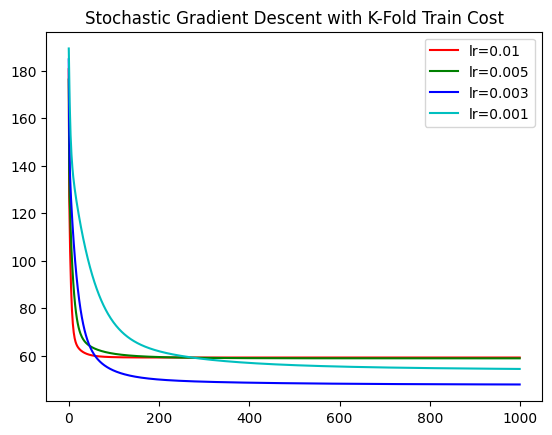

In [25]:
for i in range(len(sgd_kfold_train_costs)):
    plt.plot(sgd_kfold_train_costs[i], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with K-Fold Train Cost')
plt.show()